1. Load Dataset

In [587]:
%pip install pandas
%pip install scikit-learn
%pip install xgboost
import pandas as pd


df = pd.read_csv("data/train.csv")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [588]:
df = pd.read_csv("data/train.csv")

2. Data Exploration

2a. Understand The Data

In [589]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [590]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [591]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [592]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [593]:
df["Survived"].value_counts()
baseline_accuracy = df["Survived"].value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.62


In [594]:
df.shape

(891, 12)

2b. Remove Missing Data

In [595]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [596]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: str

In [597]:
columns_to_drop = ["Cabin", "Ticket", "Name", "PassengerId"]
df = df.drop(columns=columns_to_drop)

In [598]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [599]:
from sklearn.impute import KNNImputer

# categorical_columns = ["Embarked", "Sex"]

# df = pd.get_dummies(df, columns=categorical_columns)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [600]:
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(df[["Age", "Fare", "Pclass", "SibSp", "Parch"]])
df[["Age", "Fare", "Pclass", "SibSp", "Parch"]] = imputed_values
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.8
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [601]:
fractional_check = df[(df['Age'] > 1) & (df['Age'] % 1 != 0)]

print(f"Number of fractional ages found: {len(fractional_check)}")

Number of fractional ages found: 176


In [602]:
df.loc[df['Age'] > 1, 'Age'] = df.loc[df['Age'] > 1, 'Age'].round()

In [603]:
fractional_check = df[(df['Age'] > 1) & (df['Age'] % 1 != 0)]

print(f"Number of fractional ages found: {len(fractional_check)}")

Number of fractional ages found: 0


2c. Stats on Data

In [604]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.856532,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.389013,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2d. Individual Variable Stats

In [605]:
%pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [606]:
import matplotlib.pyplot as plt

<Axes: >

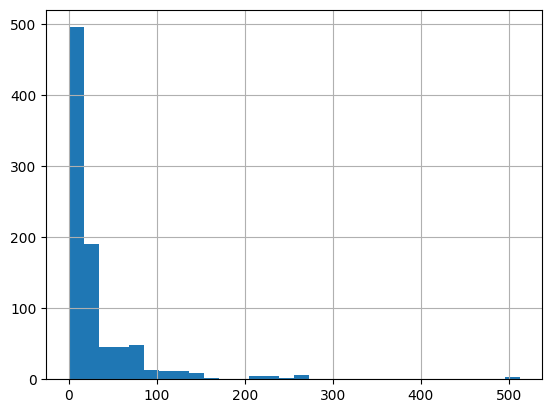

In [607]:
df["Fare"].hist(bins=30)

In [608]:
%pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [609]:
import seaborn as sns

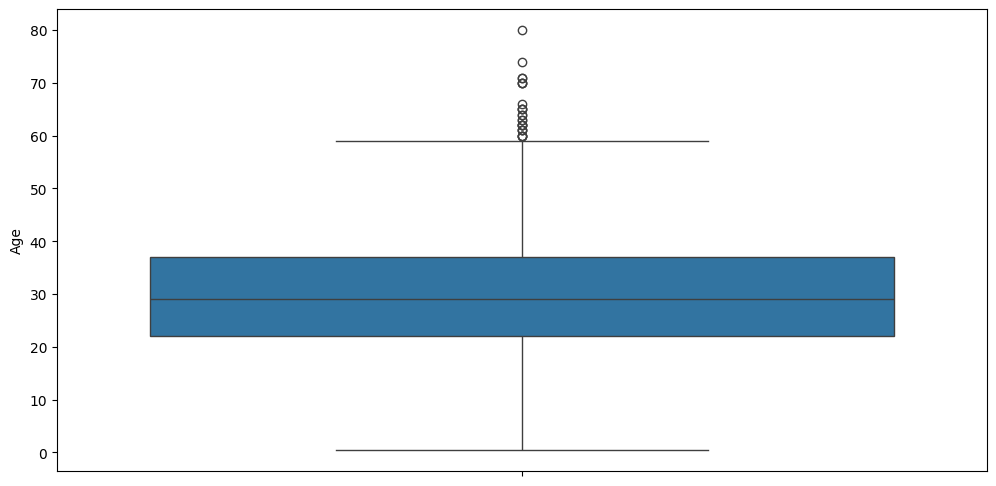

In [610]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df["Age"])
plt.xticks(rotation=45)
plt.show()

<Axes: >

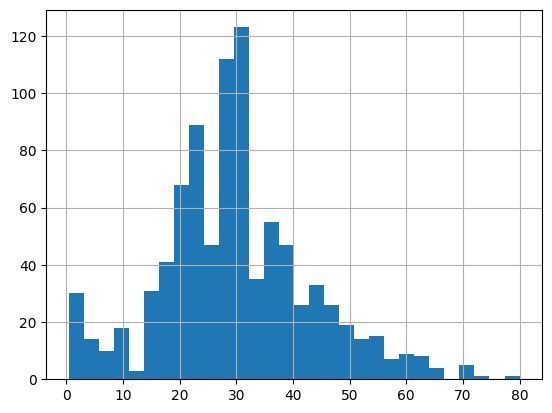

In [611]:
df["Age"].hist(bins=30)

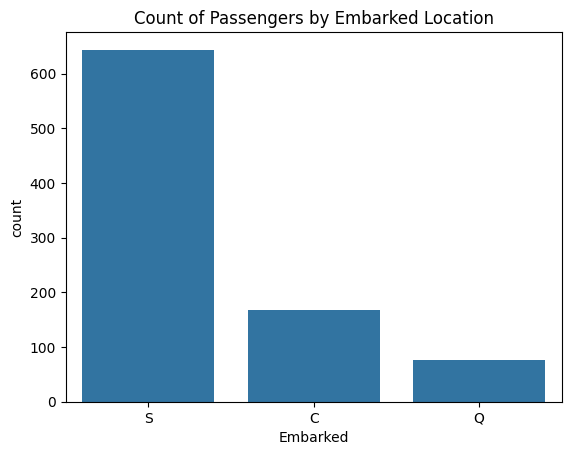

In [612]:
sns.countplot(data=df, x='Embarked')
plt.title('Count of Passengers by Embarked Location')
plt.show()

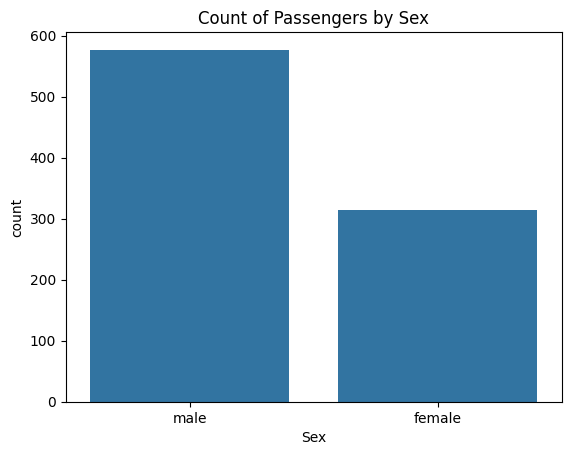

In [613]:
sns.countplot(data=df, x='Sex')
plt.title('Count of Passengers by Sex')
plt.show()

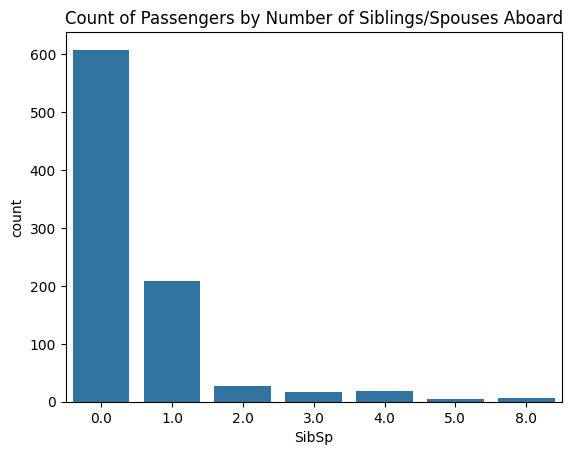

In [614]:
sns.countplot(data=df, x='SibSp')
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.show()

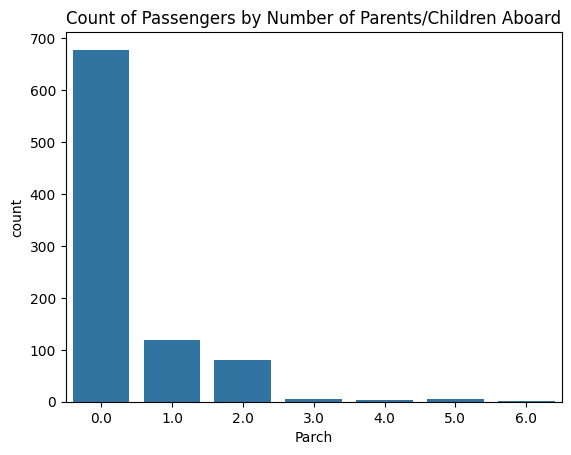

In [615]:
sns.countplot(data=df, x='Parch')
plt.title('Count of Passengers by Number of Parents/Children Aboard')
plt.show()

2e. Between Variable Stats

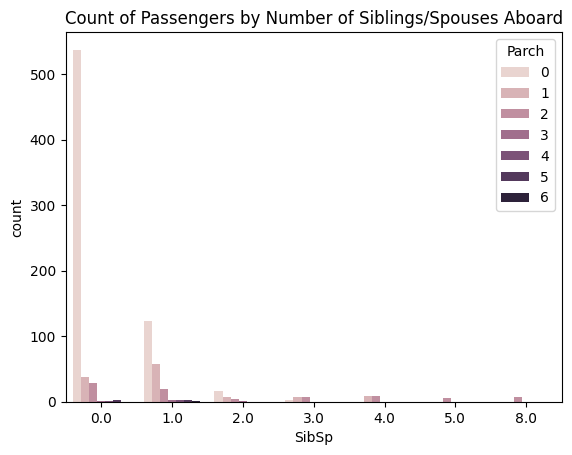

In [616]:
sns.countplot(data=df, x='SibSp', hue="Parch")
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

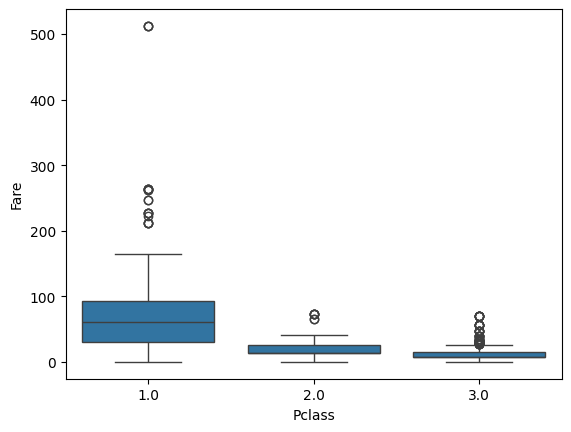

In [617]:
sns.boxplot(data=df, x='Pclass', y='Fare')


<Axes: xlabel='Pclass', ylabel='Embarked'>

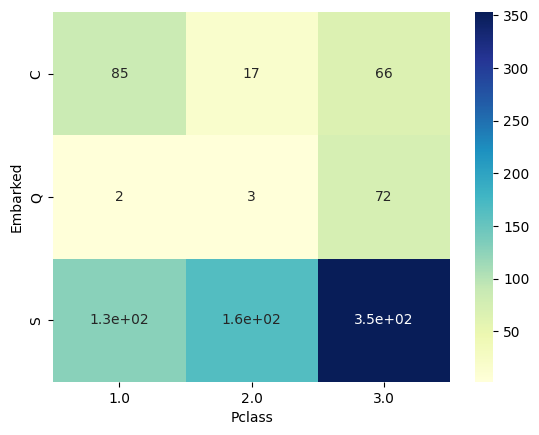

In [618]:
ct = pd.crosstab(df["Embarked"], df["Pclass"])
sns.heatmap(ct, annot=True, cmap='YlGnBu')

<Axes: xlabel='Pclass', ylabel='Sex'>

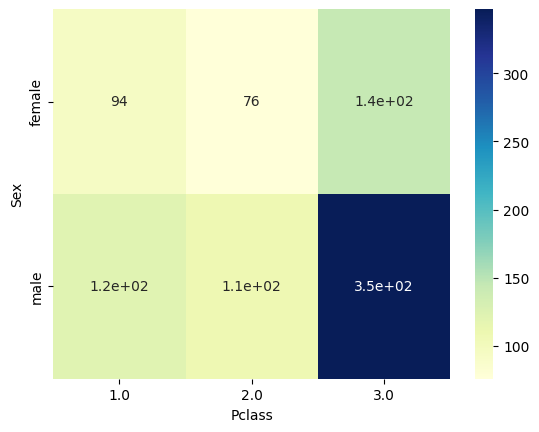

In [619]:
ct = pd.crosstab(df["Sex"], df["Pclass"])
sns.heatmap(ct, annot=True, cmap='YlGnBu')

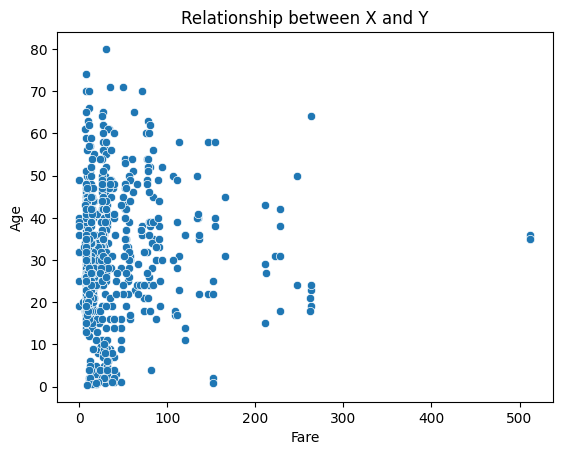

In [620]:
sns.scatterplot(data=df, x='Fare', y='Age')
plt.title('Relationship between X and Y')
plt.show()

In [621]:
df.head()
covariance_matrix_columns = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
covariance_matrix = df[covariance_matrix_columns].cov()
covariance_matrix

,Age,Fare,Pclass,SibSp,Parch
Age,179.265657,67.237166,-4.235445,-3.268229,-2.027304
Fare,67.237166,2469.436846,-22.830196,8.748734,8.661052
Pclass,-4.235445,-22.830196,0.699015,0.076599,0.012429
SibSp,-3.268229,8.748734,0.076599,1.216043,0.368739
Parch,-2.027304,8.661052,0.012429,0.368739,0.649728


In [622]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[covariance_matrix_columns])
scaled_df = pd.DataFrame(scaled_features, columns=covariance_matrix_columns)
covariance_matrix_scaled = scaled_df.cov()
covariance_matrix_scaled

,Age,Fare,Pclass,SibSp,Parch
Age,1.001124,0.101169,-0.378787,-0.221604,-0.188058
Fare,0.101169,1.001124,-0.550117,0.159830,0.216468
Pclass,-0.378787,-0.550117,1.001124,0.083175,0.018463
SibSp,-0.221604,0.159830,0.083175,1.001124,0.415304
Parch,-0.188058,0.216468,0.018463,0.415304,1.001124


2f. Between Variable and Target Stats

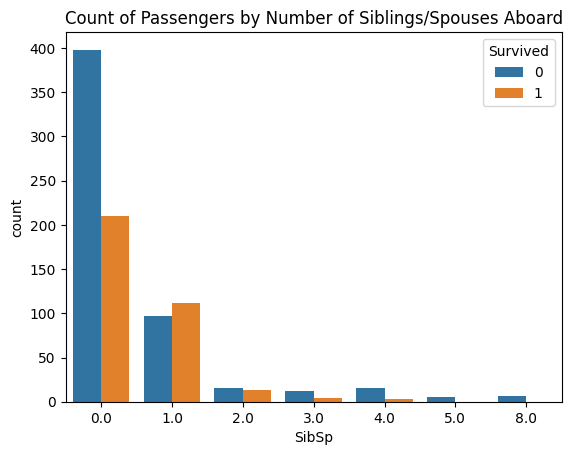

In [623]:
sns.countplot(data=df, x='SibSp', hue="Survived")
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')
plt.show()

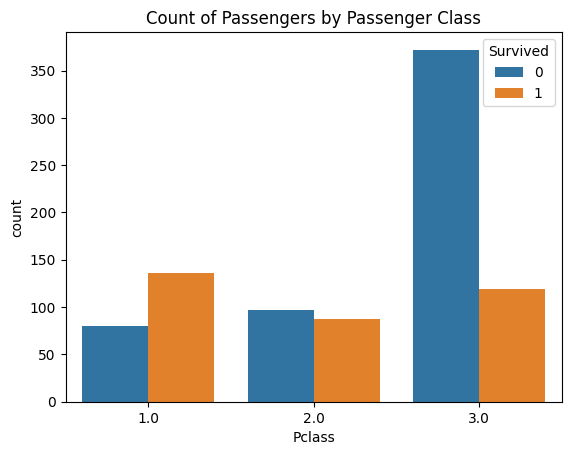

In [624]:
sns.countplot(data=df, x='Pclass', hue="Survived")
plt.title('Count of Passengers by Passenger Class')
plt.show()

In [625]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='str')

<Axes: xlabel='Age', ylabel='Count'>

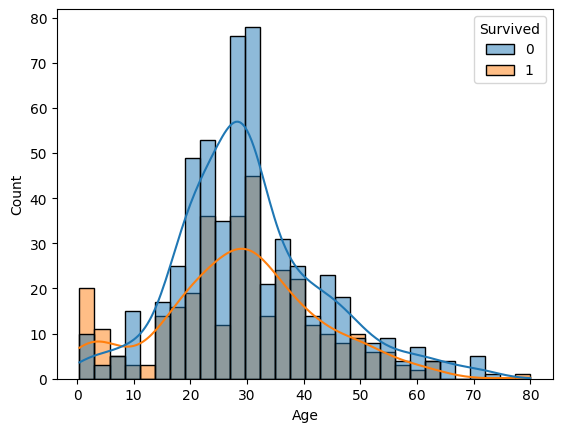

In [626]:
sns.histplot(data=df, x='Age', hue="Survived", bins=30, kde=True)

<Axes: xlabel='Fare'>

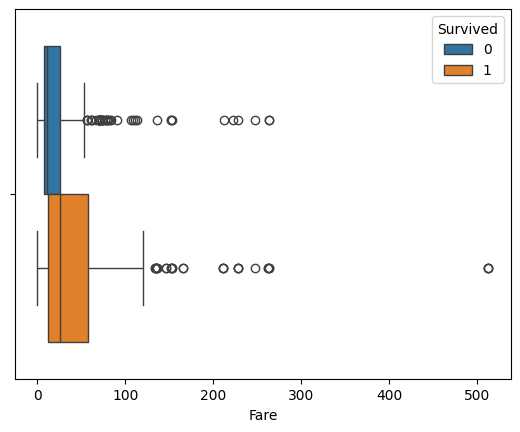

In [627]:
sns.boxplot(data=df, x='Fare', hue="Survived")

2g. Feature Engineering (Normalization, Encoding, New Features, Transformations)

In [628]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='str')

In [629]:
df["isAlone"] = (df["SibSp"] == 0) & (df["Parch"] == 0)
df["isAlone"] = df["isAlone"].astype(int)
df["isAlone"]

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: isAlone, Length: 891, dtype: int64

In [630]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilySize"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [631]:
df["isChild"] = (df["Age"] < 18).astype(int)
df["isChild"].sum()

np.int64(119)

In [632]:
df["isSenior"] = (df["Age"] >= 60).astype(int)
df["isSenior"].sum()

np.int64(26)

In [633]:
df["isAdult"] = ((df["Age"] >= 18) & (df["Age"] < 60)).astype(int)
df["isAdult"].sum()

np.int64(746)

In [634]:
df["Fare"].cov(df["Age"])

np.float64(67.23716591980101)

In [635]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'isAlone', 'FamilySize', 'isChild', 'isSenior', 'isAdult'],
      dtype='str')

In [636]:
categorical_columns = ["Embarked", "Sex", "Pclass"]

df = pd.get_dummies(df, columns=categorical_columns)

In [637]:
from sklearn.decomposition import PCA

# Option A: Reduce to exactly 2 dimensions (great for scatter plots)
# pca = PCA(n_components=5)

# Option B: Keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)

scaled_features = scaler.fit_transform(df.drop(columns=["Survived"]))
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(columns=["Survived"]).columns)
scaled_df.head()

,Age,SibSp,Parch,Fare,isAlone,FamilySize,isChild,isSenior,isAdult,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,-0.587119,0.432793,-0.473674,-0.502445,-1.231645,0.059160,-0.392613,-0.173372,0.440874,-0.482043,-0.307562,0.619306,-0.737695,0.737695,-0.565685,-0.510152,0.902587
1,0.608562,0.432793,-0.473674,0.786845,-1.231645,0.059160,-0.392613,-0.173372,0.440874,2.074505,-0.307562,-1.614710,1.355574,-1.355574,1.767767,-0.510152,-1.107926
2,-0.288199,-0.474545,-0.473674,-0.488854,0.811922,-0.560975,-0.392613,-0.173372,0.440874,-0.482043,-0.307562,0.619306,1.355574,-1.355574,-0.565685,-0.510152,0.902587
3,0.384372,0.432793,-0.473674,0.420730,-1.231645,0.059160,-0.392613,-0.173372,0.440874,-0.482043,-0.307562,0.619306,1.355574,-1.355574,1.767767,-0.510152,-1.107926
4,0.384372,-0.474545,-0.473674,-0.486337,0.811922,-0.560975,-0.392613,-0.173372,0.440874,-0.482043,-0.307562,0.619306,-0.737695,0.737695,-0.565685,-0.510152,0.902587


In [638]:
X_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Survived"] = df["Survived"].values
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Survived
0,-0.019052,-1.452887,0.352498,-0.325956,1.128385,-0.309104,-0.135095,-0.267935,-0.530394,-0.415678,0
1,0.849608,3.678584,-1.354847,0.206605,0.213080,-0.539103,-0.037252,-0.622191,-1.065251,-0.724026,1
2,-0.543031,-0.527039,-0.566862,1.927675,-0.088508,0.621953,-1.498113,-0.657124,-0.237562,0.363000,1
3,0.778173,2.143099,0.774360,1.151525,0.469511,0.378005,-1.213069,0.580570,-0.996266,-1.032774,1
4,-1.642556,-1.304619,0.213817,-0.255166,0.532334,0.080594,-0.576011,-0.332333,0.079109,0.122697,0


In [639]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {pca.explained_variance_ratio_.sum():.2f}")
print(f"Principal Components: {pca.components_}")

Explained Variance Ratio: [0.23465534 0.16446754 0.11908347 0.10657542 0.08785064 0.07800259
 0.06494178 0.04943739 0.03354601 0.02596089]
Total Explained Variance: 0.96
Principal Components: [[-0.2336902   0.37046492  0.37076811  0.13356541 -0.38687519  0.43842966
   0.34139838 -0.03322145 -0.29947463  0.02740562 -0.03368584 -0.00217654
   0.22517145 -0.22517145 -0.00646972 -0.00943375  0.01325206]
 [ 0.29179489 -0.06275724  0.01744869  0.40244882 -0.1075693  -0.03417534
  -0.18656747  0.12091153  0.11680247  0.31070925 -0.06510743 -0.2365165
   0.23285224 -0.23285224  0.47857308  0.0124617  -0.42248281]
 [ 0.19459221  0.0957679   0.10227201  0.04924934 -0.08286944  0.11654748
  -0.09083897  0.13380217  0.02270406 -0.35989346 -0.40434157  0.56883165
  -0.15518264  0.15518264  0.0712828   0.33442799 -0.33359401]
 [-0.0862087  -0.10882494 -0.00902771 -0.1434004   0.00449616 -0.0788882
  -0.17081893 -0.31746846  0.30217951 -0.22015021  0.08754885  0.13888313
   0.50745969 -0.50745969 -0.

3. Selecting Model

Models I want to consider:

    - Logistic Regression
    - Random Forest
    - XGBoost


In [665]:
from sklearn.linear_model import LogisticRegression

max_iter = 1000

logistic_regression = LogisticRegression(max_iter=max_iter)

In [666]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 50
max_depth = 10

random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

In [667]:
from xgboost import XGBClassifier

learning_rate = 0.1
n_estimators = 100
max_depth = 10

xgb_classifier = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

4. Hyperparameter Tuning

5. Training (Check Baseline)

In [668]:
df["Survived"].value_counts()
baseline_accuracy = df["Survived"].value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.62


In [669]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'isAlone', 'FamilySize',
       'isChild', 'isSenior', 'isAdult', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1.0', 'Pclass_2.0',
       'Pclass_3.0'],
      dtype='str')

In [670]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=["Survived"]), df["Survived"]
Xpca, ypca = df_pca.drop(columns=["Survived"]), df_pca["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca, ypca, test_size=0.2, random_state=42)

In [671]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

6. Evaluate Model

In [672]:
for model in [logistic_regression, random_forest, xgb_classifier]:
    for dataset in [("Original", X_train, y_train, X_test, y_test), ("PCA", Xpca_train, ypca_train, Xpca_test, ypca_test)]:
        dataset_name, X_tr, y_tr, X_te, y_te = dataset
        accuracy = train_and_evaluate(model, X_tr, y_tr, X_te, y_te)
        print(f"{model.__class__.__name__} on {dataset_name} dataset: Accuracy = {accuracy:.4f}")

LogisticRegression on Original dataset: Accuracy = 0.8045
LogisticRegression on PCA dataset: Accuracy = 0.8101
RandomForestClassifier on Original dataset: Accuracy = 0.8492
RandomForestClassifier on PCA dataset: Accuracy = 0.8156
XGBClassifier on Original dataset: Accuracy = 0.8212
XGBClassifier on PCA dataset: Accuracy = 0.7989
